# 패키지 셋팅 및 데이터 호출

@@@ 데이터 분석 순서 @@@
1. 목표를 설정한다.
2. 데이터를 구한다.
3. 데이터를 파악하기 위해 탐색 및 시각화한다다.
4. 어떠한 방법으로 문제를 해결할지 선택한다.
5. 선택한 방법으로 데이터를 학습시킨다.
6. 모델을 상세하게 조정한다.
7. 유의미한 결과가 나오면 해당 방법을 통해 솔루션을 제시한다.
8. 적용한 뒤 잘 작동하는지 모니터링한다.

* https://kaggle.com/datasets/
* https://archive.ics.uci.edu/ml/
* https://aws.amazon.com/ko/datasets
* https://dacon.io/

- 패키지 호출

In [3]:
import os


import pandas as pd
import numpy as np

from datetime import datetime , timedelta
import warnings
import itertools
from itertools import product
from tqdm import tqdm_notebook
from math import sqrt

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 20, 10

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

%matplotlib inline

<ipython-input-3-2774ff132ea4>:38: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
import warnings
warnings.filterwarnings("ignore")

- 현재 디렉토리 확인 및 폴더디렉토리 내 파일 리스트 확인

In [5]:
import os
os.getcwd()

'D:\\남정재\\문서\\2020 Open Up 공개SW전문교육 빅데이터(심화)'

- 데이터 호출

In [6]:
df_order = pd.read_excel("./data/Superstore.xls",sheet_name = "Orders", dtype="unicode")

In [7]:
df_order

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9399999999999,3,0,219.58199999999997
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0,6.8713999999999995
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.03100000000006
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000000000002,2,0.2,2.516399999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21 00:00:00,2014-01-23 00:00:00,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.102799999999999
9990,9991,CA-2017-121258,2017-02-26 00:00:00,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.96,2,0,15.633199999999988
9991,9992,CA-2017-121258,2017-02-26 00:00:00,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.393200000000007
9992,9993,CA-2017-121258,2017-02-26 00:00:00,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6,4,0,13.32


# 데이터 탐색

- 데이터 rows 확인

In [8]:
df_order.shape

(9994, 21)

- 결측치 확인

In [9]:
df_order.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

- 각 컬럼 데이터타입 확인

In [10]:
df_order.dtypes

Row ID           object
Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales            object
Quantity         object
Discount         object
Profit           object
dtype: object

- 데이터 타입 변경

In [11]:
df_order.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136


In [12]:
df_order["Order Date"] = pd.to_datetime(df_order["Order Date"])
df_order["Ship Date"] = pd.to_datetime(df_order["Ship Date"])
df_order["Discount"] = df_order["Discount"].astype(np.float)
df_order["Sales"] = df_order["Sales"].astype(np.float)
df_order["Quantity"] = df_order["Quantity"].astype(np.float)
df_order["Profit"] = df_order["Profit"].astype(np.float)

In [13]:
df_order.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136


- 이상치 확인

<AxesSubplot:xlabel='Sales'>

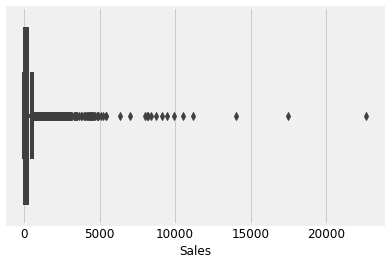

In [14]:
sns.boxplot(x=df_order["Sales"])

- 총 주문량

In [15]:
df_order.shape

(9994, 21)

In [16]:
df_order["Order ID"].nunique()

5009

In [17]:
#df_order["Order ID"].unique().tolist()

- 한 주문당 여러 상품이 포함되어있는경우 1개의 중복으로 계산되기 때문에 Order ID기준으로 중복제거

- 가장 많은 상품을 구매한 주문번호 확인

In [18]:
df_order["Order ID"].value_counts()

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2017-108329    1 
US-2017-131583    1 
CA-2017-164329    1 
CA-2017-160983    1 
CA-2014-103373    1 
Name: Order ID, Length: 5009, dtype: int64

- 가장 많은 상품을 구매한 주문번호의 내역 확인

In [19]:
df_order["Order ID"].value_counts()

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2017-108329    1 
US-2017-131583    1 
CA-2017-164329    1 
CA-2017-160983    1 
CA-2014-103373    1 
Name: Order ID, Length: 5009, dtype: int64

In [20]:
df_order[df_order["Order ID"]=="CA-2017-100111"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6090,6091,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,3.0,0.1,18.1764
6091,6092,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,TEC-AC-10002647,Technology,Accessories,"Logitech Wireless Boombox Speaker - portable - wireless, wired",212.800,2.0,0.0,95.7600
6092,6093,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-PA-10000807,Office Supplies,Paper,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x 5-1/2, 50 Sheets per Pad",38.520,9.0,0.0,18.1044
6093,6094,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,2.0,0.0,21.7920
6094,6095,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x 6-15/16d x 11-1/4h",45.400,4.0,0.0,12.7120
6095,6096,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity, 8 1/16” x 11”",13.760,2.0,0.0,6.3296
6096,6097,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,1.0,0.1,8.0991
6097,6098,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x 11"", Light Blue",11.784,3.0,0.2,3.9771
6098,6099,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,4.360,2.0,0.0,1.7876
6099,6100,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Stacking Chairs,2888.127,11.0,0.1,609.7157


- 카테고리변수 확인

In [21]:
df_order["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day          543 
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Ship Mode'>

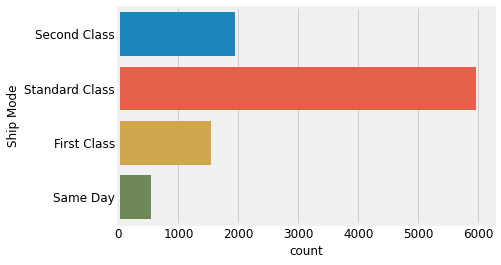

In [22]:
sns.countplot(y="Ship Mode", data=df_order)

- 주문을 많이 한 고객

In [23]:
df_order.drop_duplicates(subset=["Order ID"])["Customer ID"].value_counts()

EP-13915    17
NS-18640    13
EA-14035    13
PG-18820    13
SH-19975    13
            ..
PH-18790    1 
MG-18205    1 
CJ-11875    1 
JR-15700    1 
SM-20905    1 
Name: Customer ID, Length: 793, dtype: int64

- 고객 집단 확인

In [24]:
df_order["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

- 배송국 빈도 확인

In [25]:
df_order["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

- 배송지 주(State) 확인

In [26]:
df_order["State"].value_counts()

California              2001
New York                1128
Texas                   985 
Pennsylvania            587 
Washington              506 
Illinois                492 
Ohio                    469 
Florida                 383 
Michigan                255 
North Carolina          249 
Arizona                 224 
Virginia                224 
Georgia                 184 
Tennessee               183 
Colorado                182 
Indiana                 149 
Kentucky                139 
Massachusetts           135 
New Jersey              130 
Oregon                  124 
Wisconsin               110 
Maryland                105 
Delaware                96  
Minnesota               89  
Connecticut             82  
Missouri                66  
Oklahoma                66  
Alabama                 61  
Arkansas                60  
Rhode Island            56  
Mississippi             53  
Utah                    53  
South Carolina          42  
Louisiana               42  
Nevada        

- 배송지 중 California내의 도시 빈도 확인

In [27]:
df_order[df_order["State"]=="California"]["City"].value_counts()

Los Angeles         747
San Francisco       510
San Diego           170
San Jose            42 
Long Beach          27 
Anaheim             27 
Fresno              26 
Oakland             26 
Pasadena            25 
Westminster         17 
Bakersfield         16 
Brentwood           16 
Redlands            16 
Inglewood           16 
Riverside           14 
Santa Ana           14 
Roseville           14 
Sacramento          13 
Costa Mesa          11 
Chico               11 
Moreno Valley       10 
San Bernardino      9  
Fairfield           9  
Oxnard              9  
Santa Barbara       8  
Salinas             8  
Concord             8  
Oceanside           8  
Redondo Beach       8  
Lakewood            8  
Pomona              7  
Apple Valley        7  
Sunnyvale           6  
Vallejo             6  
Stockton            6  
Lake Forest         6  
Santa Clara         6  
Danville            6  
Huntington Beach    6  
Mission Viejo       5  
Encinitas           5  
Lancaster       

- 배송지 중 중복을 제거한 도시의 개수

In [28]:
df_order["City"].nunique() # nunique : NaN값 무시

531

In [29]:
df_order.drop_duplicates(subset=["State","City"]).shape

(604, 21)

In [30]:
df_order.drop_duplicates(subset=["State","City"])["City"].value_counts()

Columbia           4
Springfield        4
Burlington         3
Franklin           3
Lakewood           3
                  ..
Charlottesville    1
Conroe             1
Santa Barbara      1
Missoula           1
Palatine           1
Name: City, Length: 531, dtype: int64

In [31]:
df_order[df_order["City"]=="Columbia"]["State"].value_counts()

South Carolina    30
Maryland          23
Tennessee         18
Missouri          10
Name: State, dtype: int64

- 가장 판매량이 많은 제품 확인

In [32]:
df_order["Product Name"].value_counts()

Staple envelope                                                                        48
Easy-staple paper                                                                      46
Staples                                                                                46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                           1 
Xerox 20                                                                               1 
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order              1 
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner    1 
Konica Minolta magicolor 1690MF Multifunction Printer                                  1 
Name: Prod

# 변수변환

- 품목당 판매가격

In [33]:
df_order["Profit_div_Quantity"] = df_order["Profit"] / df_order["Quantity"]

In [34]:
df_order[["Profit","Quantity","Profit_div_Quantity"]]

,Profit,Quantity,Profit_div_Quantity
0,41.9136,2.0,20.9568
1,219.5820,3.0,73.1940
2,6.8714,2.0,3.4357
3,-383.0310,5.0,-76.6062
4,2.5164,2.0,1.2582
...,...,...,...
9989,4.1028,3.0,1.3676
9990,15.6332,2.0,7.8166
9991,19.3932,2.0,9.6966
9992,13.3200,4.0,3.3300


- 할인율이 젹옹된 판매가

In [35]:
df_order["Discount_apply_Sales"] = df_order["Sales"] - (df_order["Discount"] *df_order["Sales"])

In [36]:
df_order[:1]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_div_Quantity,Discount_apply_Sales
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136,20.9568,261.96


- 총 배송일 계산

In [37]:
df_order["During Date"] = df_order[["Ship Date","Order Date"]].apply(lambda row: (row[0]-row[1]).days, axis=1)

In [38]:
df_order[["Ship Date","Order Date","During Date"]]

,Ship Date,Order Date,During Date
0,2016-11-11,2016-11-08,3
1,2016-11-11,2016-11-08,3
2,2016-06-16,2016-06-12,4
3,2015-10-18,2015-10-11,7
4,2015-10-18,2015-10-11,7
...,...,...,...
9989,2014-01-23,2014-01-21,2
9990,2017-03-03,2017-02-26,5
9991,2017-03-03,2017-02-26,5
9992,2017-03-03,2017-02-26,5


- 택배의 메타데이터 , 품목데이터 분리

In [39]:
ship_df = df_order[["Order ID","Order Date","Ship Mode","Segment","City","State","Postal Code","Country","Region","During Date"]]
product_df = df_order[["Order ID","Product ID","Category","Sub-Category","Product Name","Sales","Quantity","Discount","Profit","Discount_apply_Sales"]]

- 배송물품 메타데이터 중복 제거

In [40]:
unique_ship_df = ship_df.drop_duplicates()

In [41]:
unique_ship_df.shape

(5009, 10)

- 물품 배송지 위경도 호출

In [42]:
"33311,Florida,Fort Lauderdale,United States"

'33311,Florida,Fort Lauderdale,United States'

In [43]:
input_data = "{},{},{},{}".format("33311" ,"Florida" ,"Fort Lauderdale","United States")

In [44]:
input_data

'33311,Florida,Fort Lauderdale,United States'

In [45]:
from geopy.geocoders import Nominatim
import time

In [46]:
def get_lat_lon(row):
    try:
        postal_code = row["Postal Code"]
        state = row["State"]
        city = row["City"]
        country = row["Country"]
        time.sleep(0.1)
        input_data = "{} , {} , {},{}".format(postal_code,city , state,country)
        geolocator = Nominatim(user_agent="test")
        location = geolocator.geocode(input_data)
        print(location.latitude, location.longitude)
    except AttributeError as e:
        postal_code = row["Postal Code"]
        state = row["State"]
        city = row["City"]
        country = row["Country"]
        time.sleep(0.1)
        input_data = "{} , {} , {}".format(postal_code,city , state)
        geolocator = Nominatim(user_agent="test")
        location = geolocator.geocode(input_data)
        print(location.latitude, location.longitude)
        return pd.Series([location.latitude, location.longitude])

- 유니크한 배송지 위경도 산출

In [47]:
# unique_address_df = unique_ship_df.drop_duplicates(subset=["Postal Code","State","City","Country"])[["Postal Code","State","City","Country"]]
# unique_address_df[["Ship latitude","Ship longitude"]] = unique_address_df[["Postal Code","State","City","Country"]].apply(lambda row :get_lat_lon(row),axis=1)

- 배송위치 지도 위 표시

In [48]:
unique_address_df = pd.read_csv("./data/add_lat_lon.csv")

In [49]:
unique_address_df.dtypes

Row ID                  int64  
Order ID                object 
Order Date              object 
Ship Date               object 
Ship Mode               object 
Customer ID             object 
Customer Name           object 
Segment                 object 
Country                 object 
City                    object 
State                   object 
Postal Code             int64  
Region                  object 
Product ID              object 
Category                object 
Sub-Category            object 
Product Name            object 
Sales                   float64
Quantity                int64  
Discount                float64
Profit                  float64
Profit_div_Quantity     float64
Discount_apply_Sales    float64
During Date             int64  
Ship latitude           float64
Ship longitude          float64
dtype: object

In [50]:
unique_ship_df["Postal Code"] = unique_ship_df["Postal Code"].astype(np.int)

- 배송 내 품복데이터 가공

- Category컬럼 더미변수 생성

- Sub-Category컬럼 더미변수 생성

- 수치형변수 데이터타입 변경

- 수치형변수 집약함수 사용

- 배송 메타정보 & 물품정보 결합

- 배송일 기준 Month , Day변수 추가

# 모델링

- Train & Test셋 분할

- Object 타입변수 위치 설정

- 모델 생성

- 모델 훈련

- 목표값 예측

- 모델 평가

- 변수 중요도 산출

- 중요도 산출방법[추가]

[Lime_1](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5)
[Lime_2](https://github.com/marcotcr/lime)

[Shap_1](https://data-newbie.tistory.com/254)
[Shap_2](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)


# 시계열 데이터 복습

## 시계열 데이터 탐색

- 주문데이터 기간 확인

- 사용 컬럼을 제외한 나머지 컬럼 삭제

- Order Date 기준으로 Sorting

- 데이터 타입 변환

- 날짜 기준으로 당일 판매 총액 데이터 생성

- 시계열 데이터로 다루기 위해 날짜 데이터 인덱스 설정

- resample함수를 이용해 시간단위를 변경

### Cycle(주기)

- 주기를 자기상관(autocorrelation)으로 정의하기도 한다. 자기상관은
각 시점간의 상관 관계를 의미하며 일정 기간 증가하거나 감소하는 경우 양의 자기상관이 존재한다고 하고 시점마다 증감이 반복되는 경우 이를 음의
자기상관이라 한다. 

NameError: name 'y' is not defined

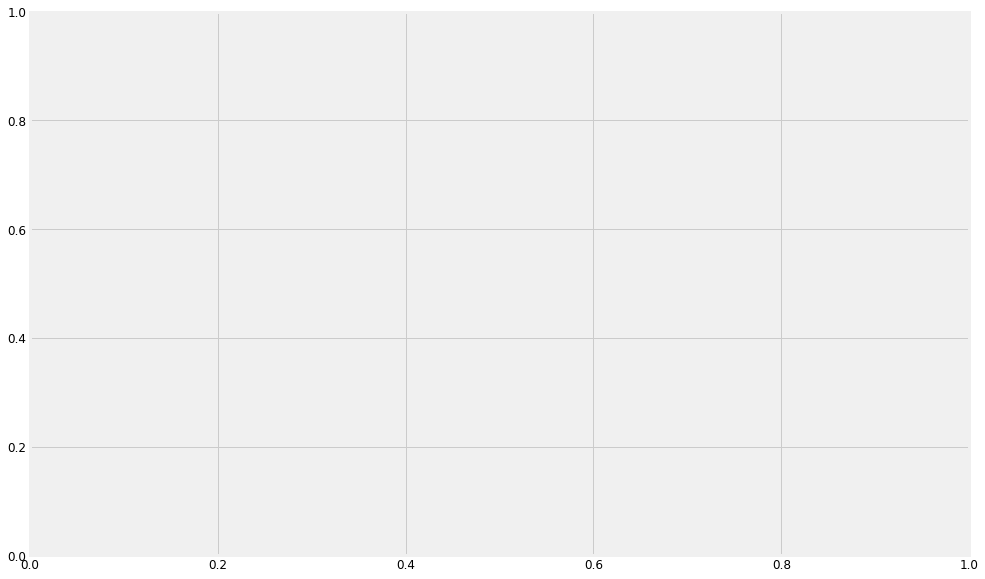

In [47]:
lags=30
fig = plt.figure(figsize=(15,10))
layout = (1,2)
acf_ax = plt.subplot2grid(layout, (0,0),colspan=2)
smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
plt.tight_layout()

### Seasonality(계절성) 
- 계절성은 주기적 변동을 나타냅니다. 
- 일년중 2월과 8월에 원룸 대학가 주변의 원룸계약건수가 높거나 , 대형마트의 물건판매량이 7~9시에 높아진것을 예로들수 있습니다.

### Stationarity
- Stationarity성은 시계열의 중요한 특성입니다. 시계열데이터가 Stationarity하다는 것은 시간이 변해도 평균과 분산은 일정합니다.
- 고전 시계열 모델은 Stationarity조건을 가정하는 경우가 많습니다.

#### Augmented Dickey-Fuller test
- 귀무 가설 (H0) : 시간 t의 변화에 따라 분산이 무한대로 발산
- 대립 가설 (H1) : 시간 t의 변화에 따라 평균 , 분산이 변하지 않음.
- p-value> 0.05 : 귀무 가설 (H0)을 기각 할 수 없습니다. Stationarity하지 않습니다.
- p-value <= 0.05 : 귀무 가설 (H0)을 기각합니다. Stationarity상태입니다.

In [ ]:
print("adf 검정통계량 : {0:.5f}".format(sm.tsa.stattools.adfuller(y)[0]))
print("p-value : {0:.5f}".format(sm.tsa.stattools.adfuller(y)[1]))

In [ ]:
# 시계열 덧셈 분해 후 Trend /  Seasonal / Residual 로 구분
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### 시계열 전처리

- [결측치 처리](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)
- [이상치 탐지](#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20of%20Price%20Anomaly%20Detection%20Expedia.ipynb)


## 시계열 모델링

- Moving average(이동평균)

### 이동평균(Moving Average)

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [ ]:
plot_moving_average(y, 5)

In [ ]:
plot_moving_average(y, 12)

### Prophet 패키지를 이용한 예측

In [ ]:
m = Prophet()
m.fit(prophet_input_df)
future = m.make_future_dataframe(periods=12,freq="MS")
future.tail()

forecast = m.predict(future)
forecast.tail()